# Model Evaluation and Diagnostics

This notebook evaluates model performance using quantitative
metrics and visual diagnostics.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.preprocessing import train_test_split, normalize_features
from src.model import predict
from src.metrics import r2_score

In [ ]:
df = pd.read_csv("../data/house_prices.csv")

df = df[
    ["sqft_living", "bedrooms", "bathrooms", "floors", "view", "price"]
]

X = df.drop("price", axis=1).values
y = df["price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train_norm, mean, std = normalize_features(X_train)
X_test_norm, _, _ = normalize_features(X_test, mean, std)

In [ ]:
W = np.zeros(X_train_norm.shape[1])
b = 0.0

In [ ]:
y_train_pred = predict(X_train_norm, W, b)
y_test_pred = predict(X_test_norm, W, b)

In [12]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_r2, test_r2

(np.float64(0.49786274976359524), np.float64(0.029545729603056348))

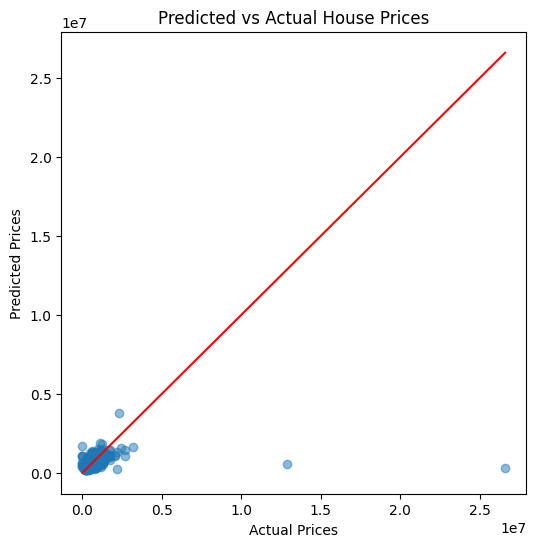

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()